Final Project - Money Oriented
Anggota :
1. Attariq M Kasfilla
2. Nizar Mochammad Yusuf

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from imblearn import over_sampling, under_sampling

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.1
pandas version :  1.2.4
seaborn version :  0.11.1


# Load Dataset

In [2]:
df_mentah = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Info

In [3]:
df_mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Change the order of columns 

In [4]:
cols = df_mentah.columns.tolist()

# remove
cols.remove('EmployeeNumber')
cols.remove('Attrition')

# insert again
cols.append('Attrition')
df_mentah = df_mentah[cols]

# Stage 1

## Data Cleansing

### Leveling DistanceFromHome

In [5]:
df_mentah['DistanceFromHome'] = pd.cut(df_mentah['DistanceFromHome'], 3, labels=[1, 2, 3])
df_mentah['DistanceFromHome'] = df_mentah['DistanceFromHome'].astype('int64')

### Delete 1 value columns

In [6]:
drop_col = []
for i,j in enumerate(df_mentah.nunique()==1):
    if j == True:
        print(i)
        drop_col.append(df_mentah.columns[i])

df_mentah.drop(drop_col, axis=1, inplace=True)

7
19
24


In [7]:
drop_col

['EmployeeCount', 'Over18', 'StandardHours']

### Missing value

In [8]:
df_mentah.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

### Duplicate Data

In [9]:
df_mentah.duplicated().sum()

0

### Outliers

In [10]:
# mengambil kolom numerik

# numerik
num_dtypes = ['int64','float64']
num_df = df_mentah.select_dtypes(num_dtypes)
numerik = num_df.columns

df_mentah[numerik].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,1.457823,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,0.748443,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,1.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,1.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,2.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,3.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


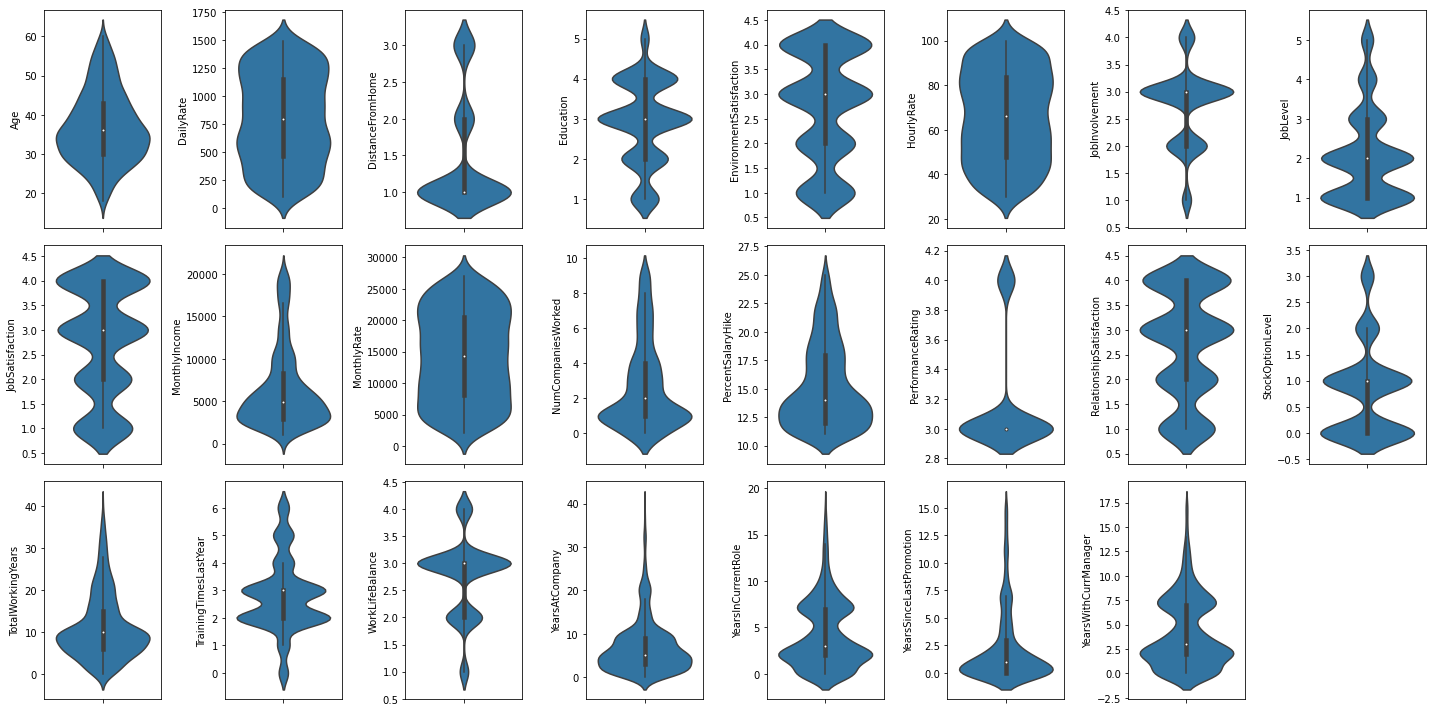

In [11]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')

for i in range(0, len(numerik)):
    plt.subplot(3, round(len(numerik)/3), i+1)
    sns.violinplot(y=df_mentah[numerik[i]], orient='v')
    plt.tight_layout()


In [12]:
# Menghapus outlier berdasarkan Z-score (Rating saja)
print(f'Jumlah baris sebelum memfilter outlier: {len(df_mentah)}')

filtered_entries = np.array([True] * len(df_mentah))

for col in numerik:
    zscore = abs(stats.zscore(df_mentah[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    # print(f'Jumlah baris setelah memfilter outlier: {len(df_mentah)}')
    
df_zscore = df_mentah[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')

Jumlah baris sebelum memfilter outlier: 1470
Jumlah baris setelah memfilter outlier: 1387


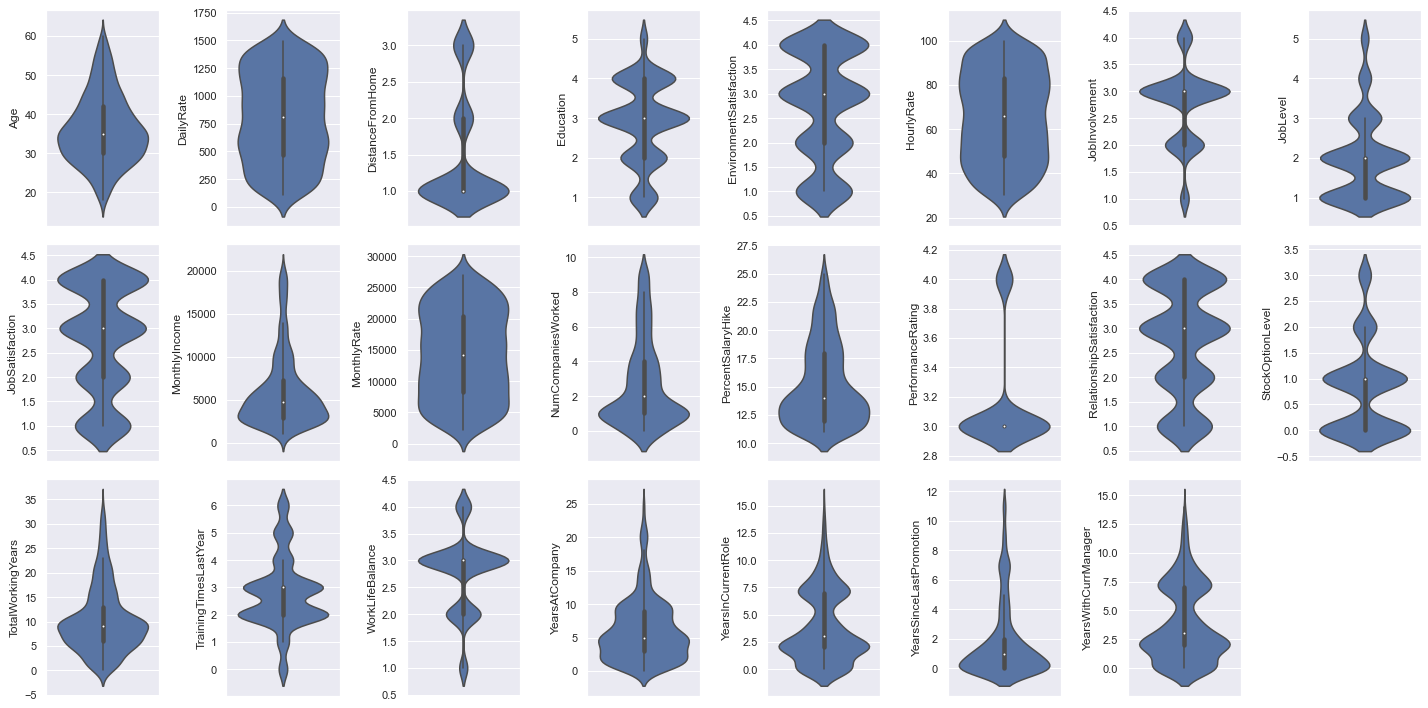

In [13]:
plt.figure(figsize=(20,10))

for i in range(0, len(numerik)):
    plt.subplot(3, round(len(numerik)/3), i+1)
    sns.violinplot(y=df_zscore[numerik[i]], orient='v')
    plt.tight_layout()


### Feature/Label Encoding

In [14]:
# # mengambil kolom kategori
cat_dtypes = ['object']
cat_df = df_zscore.select_dtypes(cat_dtypes)
kategori = cat_df.columns

df_zscore[kategori].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
count,1387,1387,1387,1387,1387,1387,1387,1387
unique,3,3,6,2,9,3,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No,No
freq,981,909,570,835,313,636,992,1158


In [15]:
# classes = []
for i in kategori:
    le = LabelEncoder()
    le.fit(df_zscore[i])
    df_zscore[i+'_label']= le.transform(df_zscore[i])
    # classes.append(le.classes_)


### Normalization/Standardization

In [16]:
# mengambil kolom numerik

# numerik
num_dtypes = ['int32', 'int64','float64']
num_df = df_zscore.select_dtypes(num_dtypes)
numerik = num_df.columns

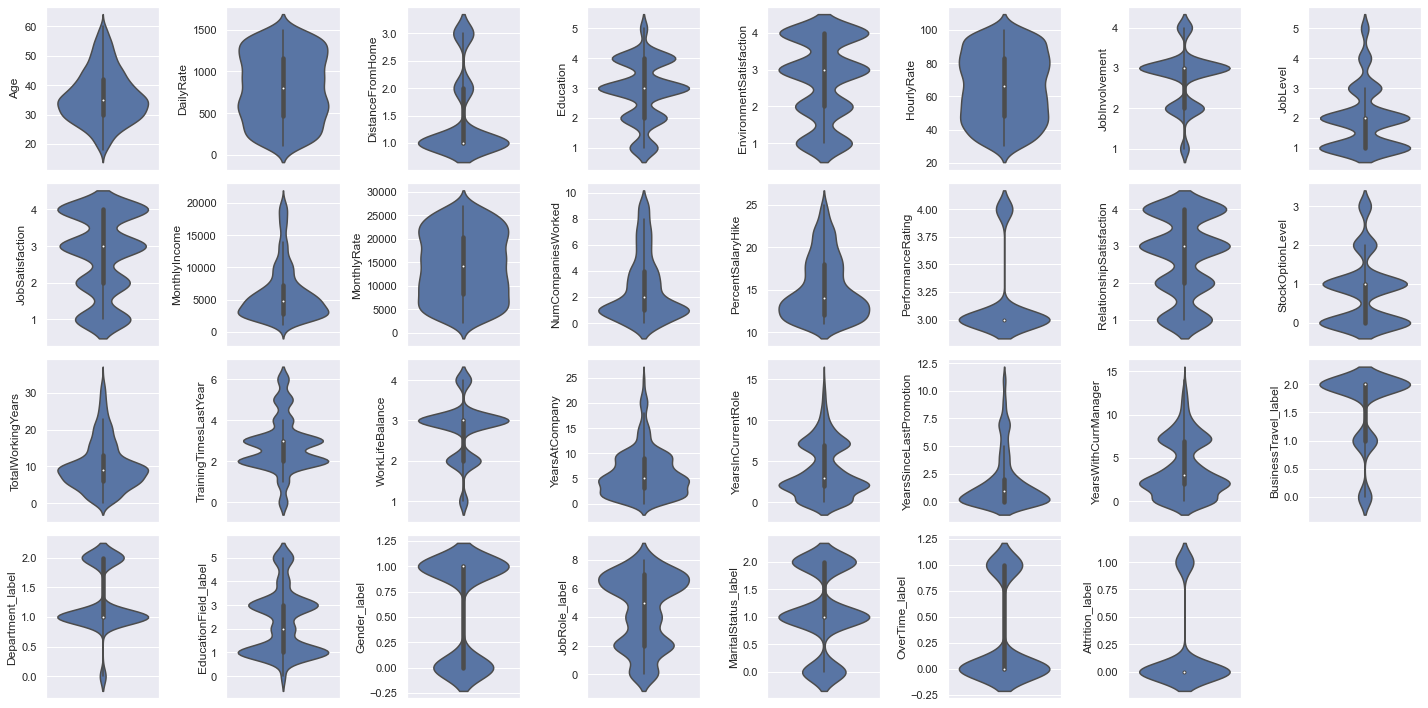

In [17]:
plt.figure(figsize=(20,10))

for i in range(0, len(numerik)):
    plt.subplot(4, round(len(numerik)/4), i+1)
    sns.violinplot(y=df_zscore[numerik[i]], orient='v')
    plt.tight_layout()


In [18]:
# Feature Scaler Using StandarScaler()
scaler = StandardScaler()
scaler.fit(df_zscore['Age'].values.reshape(len(df_zscore), 1))
df_standar = scaler.transform(df_zscore['Age'].values.reshape(len(df_zscore), 1))
df_standar = pd.DataFrame(df_standar, columns=['Age'])

# Save scaler 
import joblib
joblib.dump(scaler, 'scaler_standar.pkl')

['scaler_standar.pkl']

In [19]:
# df_standar = StandardScaler().fit_transform(df_zscore['Age'].values.reshape(len(df_zscore), 1))
# df_standar = pd.DataFrame(df_standar, columns=['Age'])

In [20]:
from sklearn.preprocessing import RobustScaler


In [21]:
normalisasi = df_zscore[numerik].columns != 'Age'
normalisasi = numerik[normalisasi]

scaler = RobustScaler()
scaler.fit(df_zscore[normalisasi])
df_normalisasi = scaler.transform(df_zscore[normalisasi])
df_normalisasi = pd.DataFrame(df_normalisasi, columns=normalisasi)

# Save scaler 
import joblib
joblib.dump(scaler, 'scaler_robust.pkl')

# df_normalisasi = RobustScaler().fit_transform(df_zscore[normalisasi])
# df_normalisasi = pd.DataFrame(df_normalisasi, columns=normalisasi)

['scaler_robust.pkl']

In [22]:
df_scaler = pd.concat([df_standar, df_normalisasi], axis=1)
df_scaler.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_label,Department_label,EducationField_label,Gender_label,JobRole_label,MaritalStatus_label,OverTime_label,Attrition_label
0,0.536681,0.425993,0.0,-0.5,-0.5,0.800000,0.0,0.0,0.5,0.280067,...,-0.5,0.4,0.0,1.0,-0.5,-1.0,0.4,1.0,1.0,1.0
1,1.442111,-0.762455,0.0,-1.0,0.0,-0.142857,-1.0,0.0,-0.5,0.087326,...,0.0,0.8,-1.0,0.0,-0.5,0.0,0.2,0.0,0.0,0.0
2,0.083966,0.817329,0.0,-0.5,0.5,0.742857,-1.0,-1.0,0.0,-0.591625,...,-0.5,-0.6,0.0,0.0,1.0,0.0,-0.6,1.0,1.0,1.0
3,-0.368749,0.844765,0.0,0.5,0.5,-0.285714,0.0,-1.0,0.0,-0.408710,...,1.0,-0.6,-1.0,0.0,-0.5,-1.0,0.2,0.0,1.0,0.0
4,-1.047821,-0.311913,0.0,-1.0,-1.0,-0.742857,0.0,-1.0,-0.5,-0.283864,...,0.5,-0.2,0.0,0.0,0.5,0.0,-0.6,0.0,0.0,0.0


### Imbalance Data

In [23]:
# train, test = train_test_split(df_scaler, test_size=0.25, random_state=42)
train, test = train_test_split(df_scaler, test_size=0.3, random_state=42)

In [24]:
train['Attrition_label'].value_counts()

0.0    813
1.0    157
Name: Attrition_label, dtype: int64

In [25]:
# # mengambil kolom numerik

# # df_zscore.info() # check numerik data type

# # numerik
# num_dtypes = ['int64','float64', 'int32']
# num_df = df_zscore.select_dtypes(num_dtypes)
# numerik = num_df.columns

In [26]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1:]

# SMOTE
X_smote_1, y_smote_1 = over_sampling.SMOTE(random_state=42).fit_resample(X,y)
X_smote_2, y_smote_2 = over_sampling.SMOTE(0.5, random_state=42).fit_resample(X,y)


In [27]:
y_smote_1.value_counts()

Attrition_label
0.0                813
1.0                813
dtype: int64

In [28]:
y_smote_2.value_counts()

Attrition_label
0.0                813
1.0                406
dtype: int64

In [29]:
smote_1 = pd.concat([X_smote_1, y_smote_1], axis=1)
smote_2 = pd.concat([X_smote_2, y_smote_2], axis=1)

# Export Data to CSV

In [30]:
df_zscore.to_csv("df_zscore.csv", index=False)
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)
smote_1.to_csv("smote_1.csv", index=False)
smote_2.to_csv("smote_2.csv", index=False)

In [31]:
features_zscore = ['Department_label','OverTime_label', 'EnvironmentSatisfaction','JobInvolvement','YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager','WorkLifeBalance','MonthlyIncome']
features_mentah = ['Department','OverTime', 'EnvironmentSatisfaction','JobInvolvement','YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager','WorkLifeBalance','MonthlyIncome']

## DF Mentah

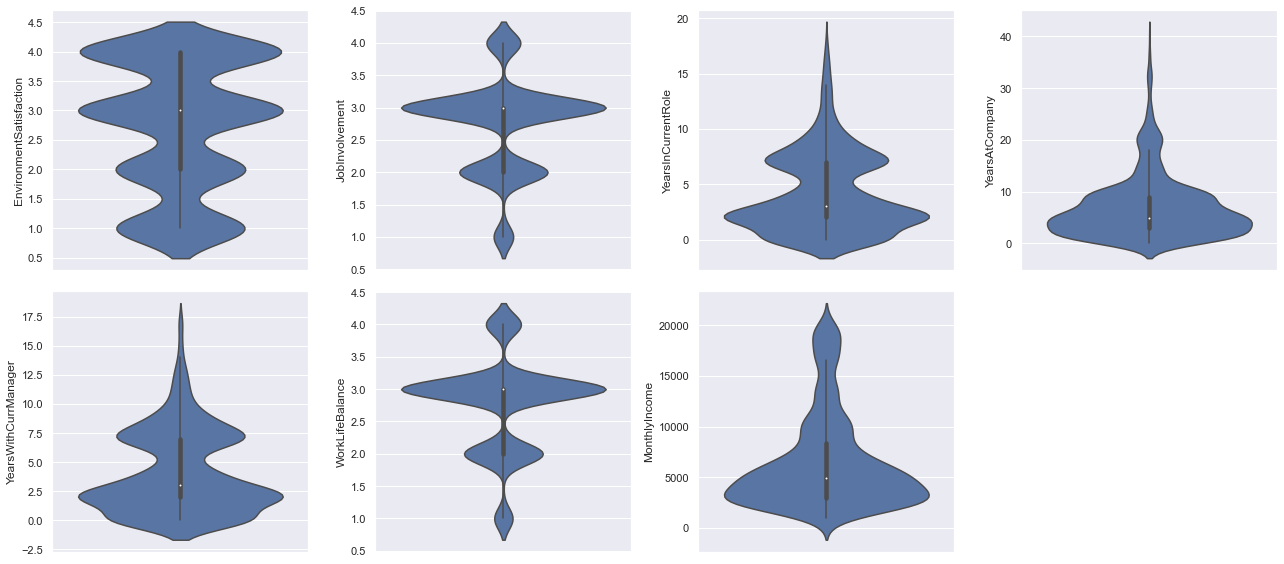

In [32]:
plt.figure(figsize=(18,8))

for i in range(0, len(features_mentah[2:])):
    plt.subplot(2, round(len(features_mentah[2:])/2), i+1)
    sns.violinplot(y=df_mentah[features_mentah[2:][i]], orient='v')
    plt.tight_layout()


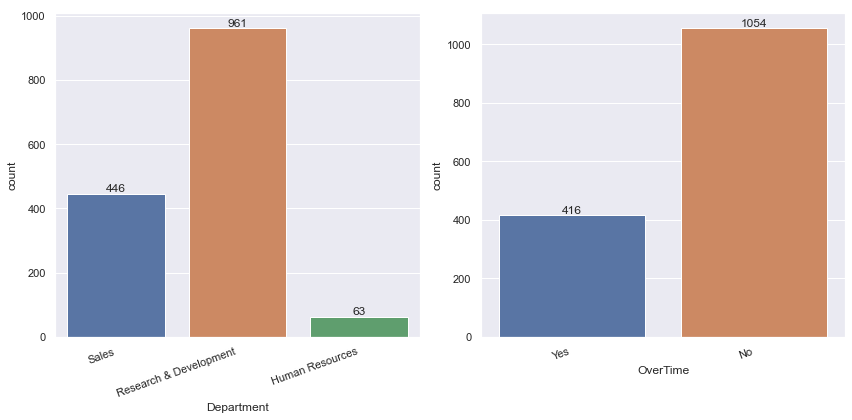

In [33]:
plt.figure(figsize=(12,6))

for i in range(0, len(features_mentah[:2])):
    plt.subplot(1, round(len(features_mentah[:2])/1), i+1)
    ax = sns.countplot(df_mentah[features_mentah[:2][i]], orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

    for p in ax.patches:
        # percentage = f'{100 * p.get_height() / total1:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'\n{p.get_height()}', (x, y), ha='center', va='bottom')

    plt.tight_layout()

## DF Z-Score

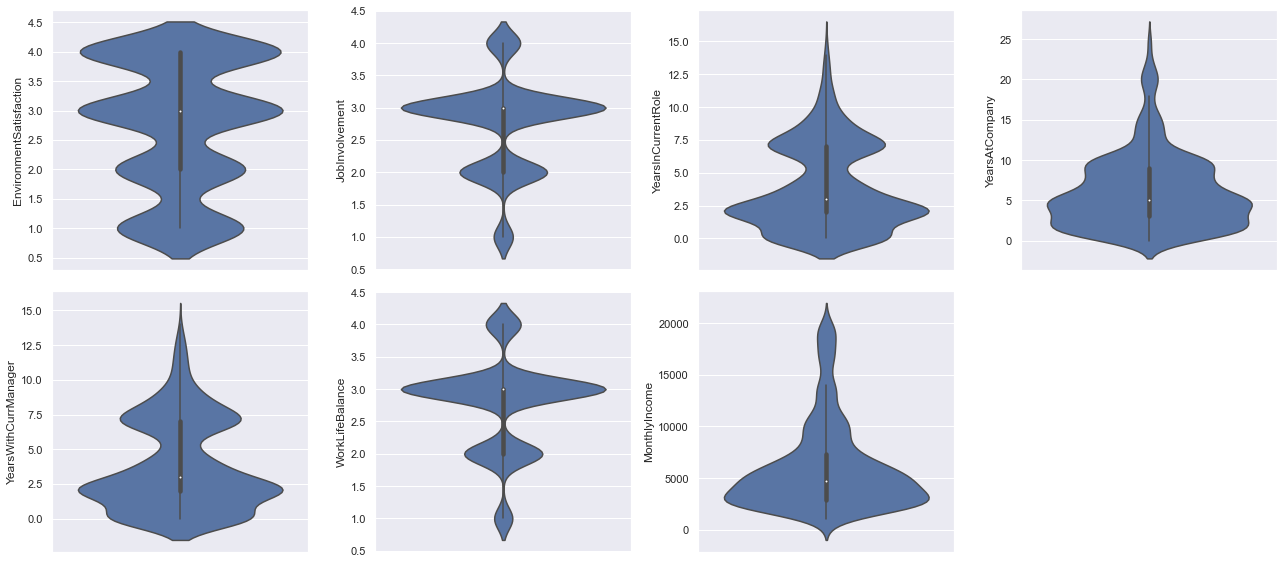

In [34]:
plt.figure(figsize=(18,8))

for i in range(0, len(features_zscore[2:])):
    plt.subplot(2, round(len(features_zscore[2:])/2), i+1)
    sns.violinplot(y=df_zscore[features_zscore[2:][i]], orient='v')
    plt.tight_layout()


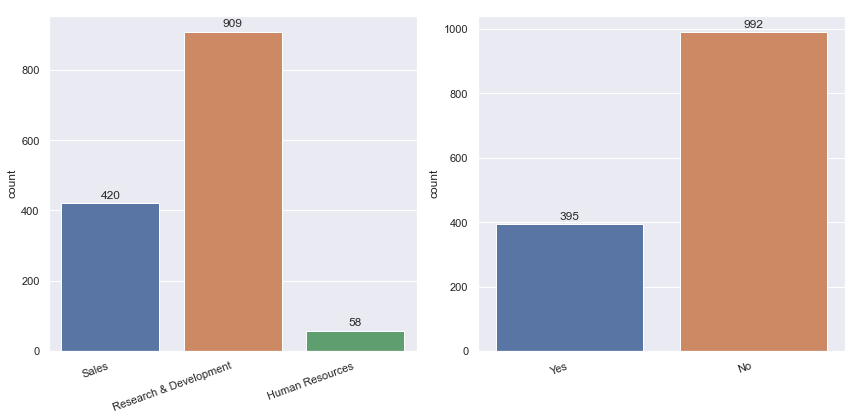

In [35]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')

for i in range(0, len(features_zscore[:2])):
    x = features_zscore[:2][i]
    x = x[:-6]
    
    le = LabelEncoder()
    le.fit(df_zscore[x])
    
    plt.subplot(1, round(len(features_zscore[:2])/1), i+1)
    ax = sns.countplot(le.inverse_transform(df_zscore[features_zscore[:2][i]]), orient='v')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

    for p in ax.patches:
        # percentage = f'{100 * p.get_height() / total1:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 40
        ax.annotate(f'\n{p.get_height()}', (x, y), ha='center', va='center')

    plt.tight_layout()

In [36]:
df_zscore.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,YearsWithCurrManager,Attrition,BusinessTravel_label,Department_label,EducationField_label,Gender_label,JobRole_label,MaritalStatus_label,OverTime_label,Attrition_label
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,5,Yes,2,2,1,0,7,2,1,1
1,49,Travel_Frequently,279,Research & Development,1,1,Life Sciences,3,Male,61,...,7,No,1,1,1,1,6,1,0,0
2,37,Travel_Rarely,1373,Research & Development,1,2,Other,4,Male,92,...,0,Yes,2,1,4,1,2,2,1,1
3,33,Travel_Frequently,1392,Research & Development,1,4,Life Sciences,4,Female,56,...,0,No,1,1,1,0,6,1,1,0
4,27,Travel_Rarely,591,Research & Development,1,1,Medical,1,Male,40,...,2,No,2,1,3,1,2,1,0,0


In [37]:
sns.countplot(x='Gender', y="Department", hue="Attrition", data=df_zscore)


ValueError: Cannot pass values for both `x` and `y`

In [43]:
plot_outlier = ['YearsAtCompany', 'YearsInCurrentRole']

In [46]:
df_zscore['YearsAtCompany']

0        6
1       10
2        0
3        8
4        2
        ..
1465     5
1466     7
1467     6
1468     9
1469     4
Name: YearsAtCompany, Length: 1387, dtype: int64

In [52]:
len(plot_outlier)

2

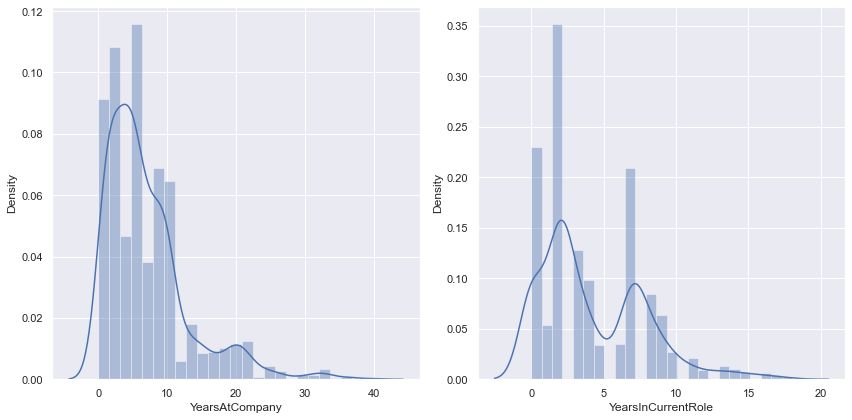

In [63]:
plt.figure(figsize=(12,6))

for i in range(0, len(plot_outlier)):
    plt.subplot(1, round(len(plot_outlier)/1), i+1)
    sns.distplot(df_mentah[plot_outlier[i]], bins=25)
    plt.tight_layout()


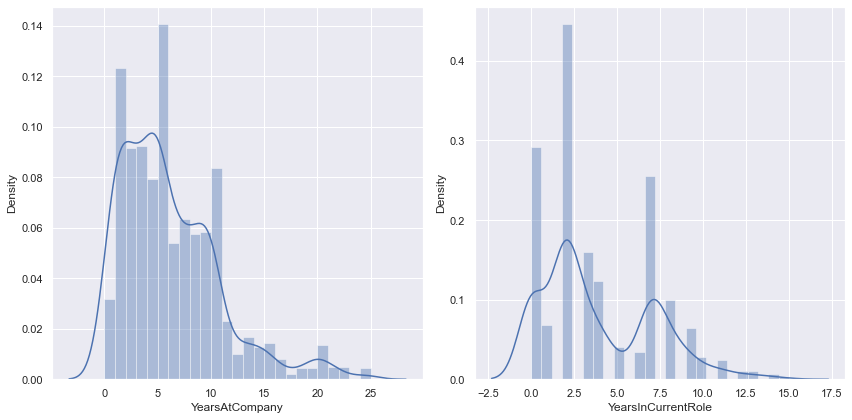

In [64]:
plt.figure(figsize=(12,6))

for i in range(0, len(plot_outlier)):
    plt.subplot(1, round(len(plot_outlier)/1), i+1)
    sns.distplot(df_zscore[plot_outlier[i]], bins=25)
    plt.tight_layout()
